In [5]:
N = 1000
holdout = 200
from sklearn import datasets
X, y = datasets.make_regression(N, shuffle=holdout)

In [8]:
X_h, y_h = X[:holdout], y[:holdout]
X_t, y_t = X[holdout:], y[holdout:]
from sklearn.cross_validation import KFold


D:\Users\13884\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
kfold = KFold(len(y_t), n_folds=4)


In [11]:
output_string = "Fold: {}, N_train: {}, N_test: {}"
for i,(train,test) in enumerate(kfold):
    print(output_string.format(i, len(y_t[train]), len(y_t[test])))

Fold: 0, N_train: 600, N_test: 200
Fold: 1, N_train: 600, N_test: 200
Fold: 2, N_train: 600, N_test: 200
Fold: 3, N_train: 600, N_test: 200


In [12]:
import numpy as np
import pandas as pd
patients = np.repeat(np.arange(0, 100, dtype=np.int8), 8)
measurements = pd.DataFrame({'patient_id': patients, 'ys': np.random.normal(0, 1, 800)})

In [19]:
custids = np.unique(measurements.patient_id)
custids

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype=int8)

In [20]:
customer_kfold = KFold(custids.size, n_folds=4)

In [23]:
output_string = "Fold: {}, N_train: {}, N_test: {}"
for i, (train, test) in enumerate(customer_kfold):
    train_cust_ids = custids[train]
    training = measurements[measurements.patient_id.isin(train_cust_ids)]
    testing  = measurements[~measurements.patient_id.isin(train_cust_ids)]
    print(output_string.format(i, len(training), len(testing)))
    

Fold: 0, N_train: 600, N_test: 200
Fold: 1, N_train: 600, N_test: 200
Fold: 2, N_train: 600, N_test: 200
Fold: 3, N_train: 600, N_test: 200


In [25]:
from sklearn import ensemble
from sklearn import datasets
from sklearn import cross_validation
X,y = datasets.make_regression(10000, 10)
rf = ensemble.RandomForestRegressor(max_features='auto')
scores = cross_validation.cross_val_score(rf, X, y)
scores

array([0.8420572 , 0.84465143, 0.83248596])

Text(0.5,1,'Histogram of dataset')

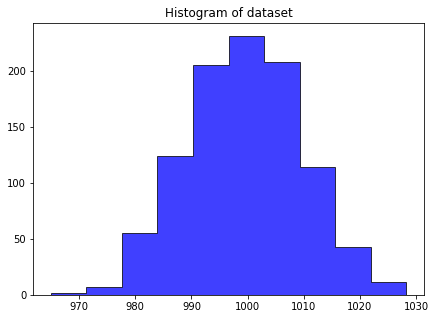

In [1]:
%matplotlib inline
import numpy as np
true_loc = 1000
true_scale = 10
N = 1000
dataset = np.random.normal(true_loc, true_scale, N)
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(7,5))
ax.hist(dataset, color='blue', edgecolor='black', alpha=0.75, histtype='stepfilled')
ax.set_title("Histogram of dataset")


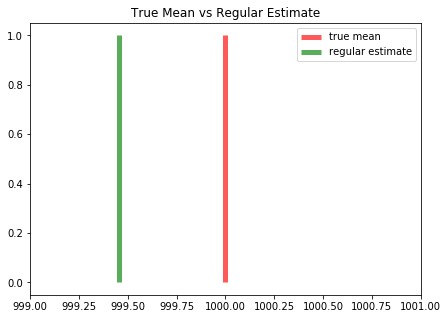

In [7]:
from sklearn import cross_validation
holdout_set = dataset[:500]
fitting_set = dataset[500:]
estimate = fitting_set.mean()
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(7, 5))
ax.set_title("True Mean vs Regular Estimate")
ax.vlines(true_loc, 0, 1, color='r', linestyles='-', lw=5, alpha=.65, label='true mean')
ax.vlines(estimate, 0, 1, color='g', linestyles='-', lw=5, alpha=.65, label='regular estimate')
ax.set_xlim(999, 1001)
ax.legend()

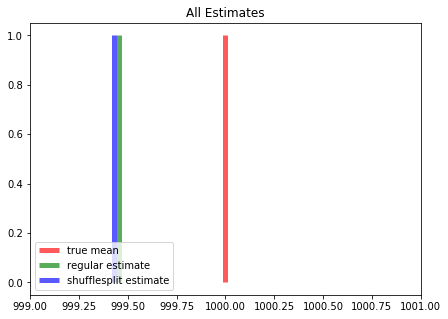

In [8]:
from sklearn.cross_validation import ShuffleSplit
shuffle_split = ShuffleSplit(len(fitting_set))
mean_p = []
for train, _ in shuffle_split:
    mean_p.append(fitting_set[train].mean())
    shuf_estimate = np.mean(mean_p)
f, ax = plt.subplots(figsize=(7, 5))
ax.vlines(true_loc, 0, 1, color='r', linestyles='-', lw=5,alpha=.65, label='true mean')
ax.vlines(estimate, 0, 1, color='g', linestyles='-', lw=5,alpha=.65, label='regular estimate')
ax.vlines(shuf_estimate, 0, 1, color='b', linestyles='-', lw=5, alpha=.65, label='shufflesplit estimate')
ax.set_title("All Estimates")
ax.set_xlim(999, 1001)
ax.legend(loc=3)

In [13]:
from sklearn import datasets
X,y = datasets.make_classification(n_samples=1000, weights=[1./11])

In [20]:
y.mean()

0.906

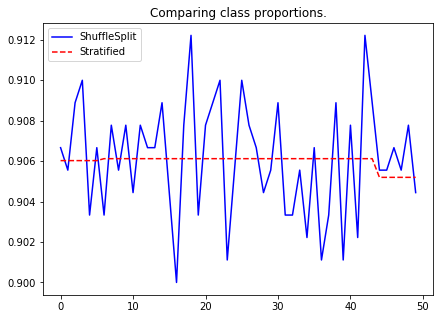

In [25]:
from sklearn import cross_validation
n_folds = 50
strat_kfold = cross_validation.StratifiedKFold(y,n_folds=n_folds)
shuff_split = cross_validation.ShuffleSplit(n=len(y), n_iter=n_folds)
kfold_y_props = []
shuff_y_props = []
for (k_train, k_test), (s_train, s_test) in zip(strat_kfold,shuff_split):
    kfold_y_props.append(y[k_train].mean())
    shuff_y_props.append(y[s_train].mean())

f, ax = plt.subplots(figsize=(7, 5))
ax.plot(range(n_folds), shuff_y_props, label="ShuffleSplit",color='b')
ax.plot(range(n_folds), kfold_y_props, label="Stratified",color='r', ls='--')
ax.set_title("Comparing class proportions.")
ax.legend(loc='best')

In [1]:
from sklearn import datasets
X,y = datasets.make_classification(n_samples=1000, n_features=5)


In [4]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [5]:
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
grid_search_params = {'penalty': ['l1', 'l2'],'C': [1, 10, 100, 0.1]}
gs = GridSearchCV(lr, grid_search_params)
gs.fit(X,y)

D:\Users\13884\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\Users\13884\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [1, 10, 100, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [6]:
gs.grid_scores_

[mean: 0.89600, std: 0.01698, params: {'C': 1, 'penalty': 'l1'},
 mean: 0.89700, std: 0.01571, params: {'C': 1, 'penalty': 'l2'},
 mean: 0.89600, std: 0.01698, params: {'C': 10, 'penalty': 'l1'},
 mean: 0.89700, std: 0.01571, params: {'C': 10, 'penalty': 'l2'},
 mean: 0.89600, std: 0.01698, params: {'C': 100, 'penalty': 'l1'},
 mean: 0.89600, std: 0.01698, params: {'C': 100, 'penalty': 'l2'},
 mean: 0.89500, std: 0.01584, params: {'C': 0.1, 'penalty': 'l1'},
 mean: 0.89800, std: 0.01342, params: {'C': 0.1, 'penalty': 'l2'}]

In [18]:
max(gs.grid_scores_, key = lambda x: x[1])

mean: 0.89800, std: 0.01342, params: {'C': 0.1, 'penalty': 'l2'}

In [19]:
X,y = datasets.make_regression()
from sklearn import dummy
dum = dummy.DummyRegressor()
dum.fit(X,y)


DummyRegressor(constant=None, quantile=None, strategy='mean')

In [25]:
dum.predict(X)[:10]

array([11.48497907, 11.48497907, 11.48497907, 11.48497907, 11.48497907,
       11.48497907, 11.48497907, 11.48497907, 11.48497907, 11.48497907])

In [36]:
predictors = [("mean", None),("median", None),("constant", 10)]
for strategy,constant in predictors:
    dumdum = dummy.DummyRegressor(strategy=strategy,constant=constant)
    
    dumdum.fit(X,y)
    print("strategy: {}".format(strategy), ",".join(map(str,dumdum.predict(X)[:5])))

strategy: mean 11.484979065181603,11.484979065181603,11.484979065181603,11.484979065181603,11.484979065181603
strategy: median -1.9323965302851,-1.9323965302851,-1.9323965302851,-1.9323965302851,-1.9323965302851
strategy: constant 10.0,10.0,10.0,10.0,10.0


In [38]:
predictors = [("constant", 0),("stratified", None),("uniform", None),("most_frequent", None)]
X, y = datasets.make_classification()
for strategy, constant in predictors:
    dumdum = dummy.DummyClassifier(strategy=strategy,constant=constant)
    dumdum.fit(X, y)
    print("strategy: {}".format(strategy), ",".join(map(str,dumdum.predict(X)[:5])))

strategy: constant 0,0,0,0,0
strategy: stratified 0,1,1,1,0
strategy: uniform 0,0,1,1,0
strategy: most_frequent 0,0,0,0,0


In [40]:
X, y = datasets.make_classification(20000, weights=[.95, .05])
umdum = dummy.DummyClassifier(strategy='most_frequent')
dumdum.fit(X, y)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [41]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y, dumdum.predict(X)))

0.9453


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline
def data(x, m=2, b=1, e=None, s=10):
    if e is None:
        e_i = 0
    elif e is True:
        e_i = np.random.normal(0, s, len(xs))
    else:
        e_i = e
    
    return x * m + b + e_i

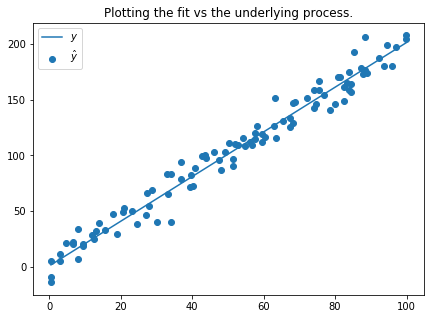

In [3]:
from functools import partial
N = 100
xs = np.sort(np.random.rand(N)*100)
y_pred_gen = partial(data, x=xs, e=True)
y_true_gen = partial(data, x=xs)
y_pred = y_pred_gen()
y_true = y_true_gen()
f,ax = plt.subplots(figsize = (7,5))
ax.set_title('Plotting the fit vs the underlying process.')
ax.scatter(xs, y_pred, label=r'$\hat{y}$')
ax.plot(xs, y_true, label=r'$y$')
ax.legend(loc='best')

(array([ 2.,  2.,  8., 24., 17., 21., 16.,  8.,  1.,  1.]),
 array([-27.90476515, -22.20411345, -16.50346176, -10.80281006,
         -5.10215836,   0.59849334,   6.29914503,  11.99979673,
         17.70044843,  23.40110013,  29.10175182]),
 <a list of 1 Patch objects>)

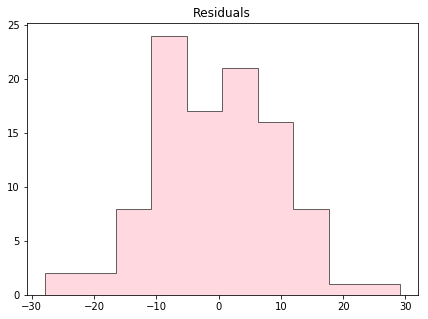

In [6]:
e_hat = y_true - y_pred
f, ax = plt.subplots(figsize=(7,5))
ax.set_title('Residuals')
ax.hist(e_hat, color='pink', edgecolor='black', alpha=0.6, histtype='stepfilled')


In [11]:
mse = ((y_true - y_pred) ** 2).mean()
mse


99.971727664891

In [12]:
metrics.mean_squared_error(y_true, y_pred)

99.971727664891

In [13]:
mad = np.abs(y_true - y_pred).mean()
mad

8.051596372203408

In [18]:
rsq = 1 - ((y_true - y_pred) ** 2).sum() / ((y_true - y_true.mean()) ** 2).sum()
rsq

0.9697579626243845

In [19]:
metrics.r2_score(y_true, y_pred)

0.9697579626243845

In [20]:
from sklearn import datasets
X,y = datasets.make_regression(n_samples=1000, n_features=10000)

In [21]:
from sklearn import feature_selection
f, p = feature_selection.f_regression(X, y)

In [22]:
f[:5]

array([0.0510807 , 1.76316256, 1.74595362, 2.96249689, 0.34797158])

In [23]:
p[:5]

array([0.8212396 , 0.18453415, 0.18668907, 0.08552617, 0.55539715])

In [24]:
import numpy as np
idx = np.arange(0, X.shape[1])
feature_to_keep = idx[p < 0.05]
len(feature_to_keep)

496

In [28]:
X, y = datasets.make_regression(10000, 20)
f_0, p = feature_selection.f_regression(X, y)

Text(0.5,1,'Feature p values')

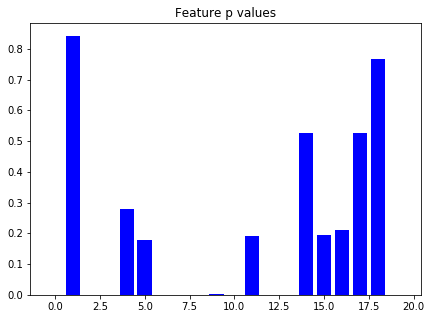

In [29]:
f, ax = plt.subplots(figsize=(7,5))
ax.bar(np.arange(20), p, color='b')
ax.set_title("Feature p values")

Text(0.5,1,'Feature f values')

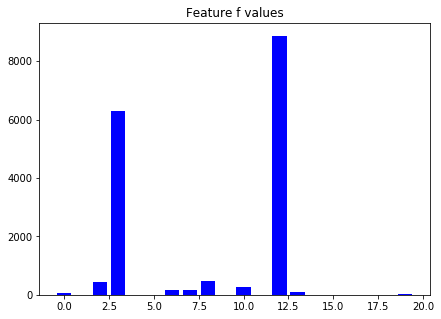

In [32]:
f, ax = plt.subplots(figsize=(7,5))
ax.bar(np.arange(20), f_0, color='b')
ax.set_title("Feature f values")

In [35]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target


In [54]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import cross_validation
from sklearn import metrics
shuff = cross_validation.ShuffleSplit(y.size, n_iter=10, test_size=0.2, random_state=7)

In [53]:
mses = []
for train,test in shuff:
    train_X = X[train]
    test_X = X[test]
    train_y = y[train]
    test_y = y[test]
    lr = LinearRegression()
    lr.fit(train_X, train_y)
    mses.append(metrics.mean_squared_error(test_y,lr.predict(test_X)))
    
print(np.mean(mses))    

2882.120759642488


In [57]:
from sklearn import feature_selection
cv = linear_model.LassoCV()
cv = cv.fit(X, y)
cv.coef_

array([  -0.        , -226.2375274 ,  526.85738059,  314.44026013,
       -196.92164002,    1.48742026, -151.78054083,  106.52846989,
        530.58541123,   64.50588257])

In [58]:
columns = np.arange(X.shape[1])[cv.coef_ != 0]
columns

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [84]:
l1mses = []
for train, test in shuff:
    train_X = X[train][:, columns]
    train_y = y[train]
    test_X = X[test][:, columns]
    test_y = y[test]
    lr.fit(train_X, train_y)
    l1mses.append(metrics.mean_squared_error(test_y, lr.predict(test_X)))
print(np.mean(l1mses))

27.580593776763436


In [63]:
np.mean(l1mses) - np.mean(mses)

-13.472607369092202

In [65]:
X,y = datasets.make_regression(noise=5)

In [90]:
mses = []
shuff = cross_validation.ShuffleSplit(y.size)
for train,test in shuff:
    train_X = X[train]
    train_y = y[train]
    test_X = X[test]
    test_y = y[test]
    lr.fit(train_X, train_y)
    mses.append(metrics.mean_squared_error(test_y, lr.predict(test_X)))
print(np.mean(mses))

2418.3859999699316


In [71]:
cv.fit(X, y)


LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [73]:
columns = np.arange(X.shape[1])[cv.coef_!=0]
columns

array([ 0,  8, 25, 31, 32, 34, 39, 41, 54, 55, 57, 59, 77, 78, 81, 88, 97])

In [94]:
mses = []
shuff = cross_validation.ShuffleSplit(y.size)
for train,test in shuff:
    train_X = X[train][:, columns]
    train_y = y[train]
    test_X = X[test][:, columns]
    test_y = y[test]
    lr.fit(train_X, train_y)
    mses.append(metrics.mean_squared_error(test_y, lr.predict(test_X)))
print(np.mean(mses))

26.604443196049754


In [96]:
from sklearn import datasets,tree
X, y = datasets.make_classification()
dt = tree.DecisionTreeClassifier()
dt.fit(X, y)
from sklearn.externals import joblib
joblib.dump(dt, "dtree.clf")

['dtree.clf']

In [97]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier()
rf.fit(X, y)
joblib.dump(rf, "rf.clf")

['rf.clf']